In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.model_selection import learning_curve

# Linear regression

In [29]:
np.random.seed(42)
m = 100
X = 2*np.random.rand(m,1)
y = 4+3 *X + np.random.randn(m, 1)

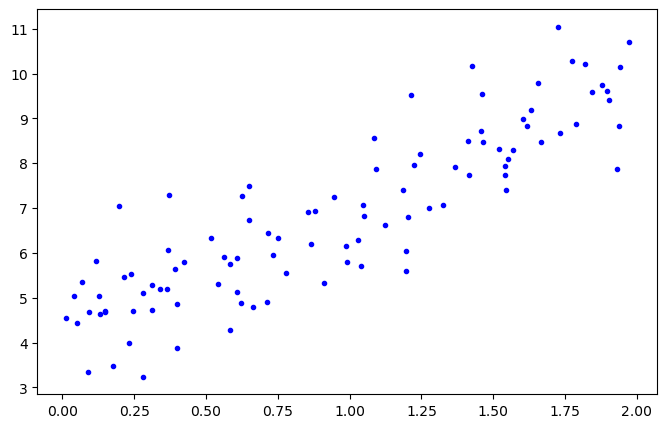

In [30]:
plt.figure(figsize=(8,5))
# plt.scatter(X,y)
plt.plot(X, y, "b.")
plt.show()

In [31]:
X.shape

(100, 1)

## using OLS by hand

In [32]:
# add 1 before
X_b = add_dummy_feature(X)
X_b[:2]

array([[1.        , 0.74908024],
       [1.        , 1.90142861]])

In [33]:
# use OLS method with formula
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@y
theta_best

array([[4.21509616],
       [2.77011339]])

## using sklearn

In [34]:
lm = LinearRegression(fit_intercept=True, copy_X=True)

In [35]:
lm.fit(X,y)

LinearRegression()

In [36]:
lm.intercept_

array([4.21509616])

In [37]:
lm.coef_

array([[2.77011339]])

In [38]:
lm.rank_ # rank of X

1

In [39]:
lm.n_features_in_

1

## using SGDRegressor: 
with SGD Process

In [40]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, power_t=0.25,
 n_iter_no_change=100, random_state=42)

In [41]:
y.shape

(100, 1)

In [42]:
y.ravel()

array([ 6.33428778,  9.40527849,  8.48372443,  5.60438199,  4.71643995,
        5.29307969,  5.82639572,  8.67878666,  6.79819647,  7.74667842,
        5.03890908, 10.14821022,  8.46489564,  5.7873021 ,  5.18802735,
        6.06907205,  5.12340036,  6.82087644,  6.19956196,  4.28385989,
        7.96723765,  5.09801844,  5.75798135,  5.96358393,  5.32104916,
        8.29041045,  4.85532818,  6.28312936,  7.3932017 ,  4.68275333,
        9.53145501,  5.19772255,  4.64785995,  9.61886731,  7.87502098,
        8.82387021,  5.88791282,  7.0492748 ,  7.91303719,  6.9424623 ,
        4.69751764,  5.80238342,  5.34915394, 10.20785545,  6.34371184,
        7.06574625,  7.27306077,  5.71855706,  7.86711877,  7.29958236,
        8.82697144,  8.08449921,  9.73664501,  8.86548845,  6.03673644,
        9.59980838,  3.4686513 ,  5.64948961,  3.3519395 ,  7.50191639,
        5.54881045,  5.30603267,  9.78594227,  4.90965564,  5.91306699,
        8.56331925,  3.23806212,  8.99781574,  4.70718666, 10.70

In [44]:
sgd_reg.fit(X, y.ravel()) # y.ravel(), weil fit() 1-D-Ziele erwartet

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [45]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [46]:
sgd_reg.n_iter_

366

# polynomial regression

In [48]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1)- 3
y =0.5* X** 2 + X + 2 + np.random.randn(m, 1)

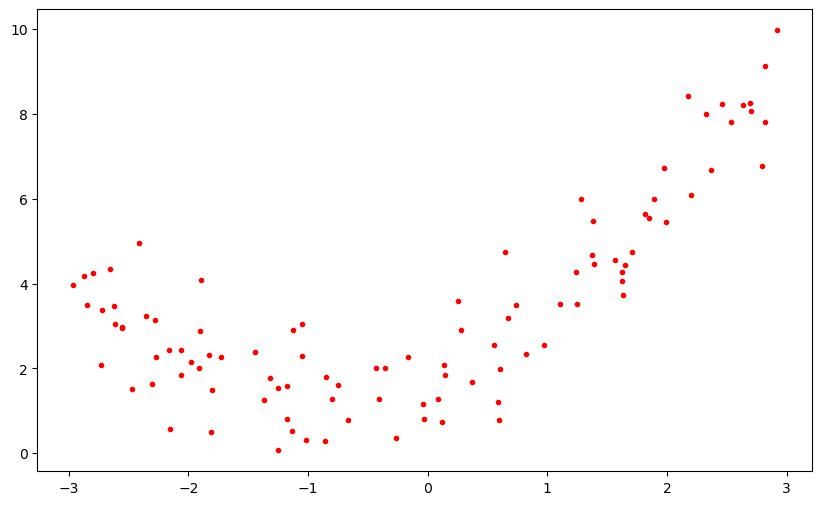

In [55]:
plt.figure(figsize=(10,6))
plt.plot(X,y,"r.")

In [57]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) # only 2 necc parameters

In [58]:
X.shape

(100, 1)

In [63]:
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-0.75275929,  0.56664654])

In [64]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [65]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# Learning curve

In [67]:
np.linspace(0.01, 1.0, 40)

array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ])

In [70]:
np.linspace(1, 5, 3)

array([1., 3., 5.])

In [71]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors =-train_scores.mean(axis=1)
valid_errors =-valid_scores.mean(axis=1)

In [80]:
X.shape

(100, 1)

In [81]:
np.linspace(0.01, 1.0, 40)*100

array([  1.        ,   3.53846154,   6.07692308,   8.61538462,
        11.15384615,  13.69230769,  16.23076923,  18.76923077,
        21.30769231,  23.84615385,  26.38461538,  28.92307692,
        31.46153846,  34.        ,  36.53846154,  39.07692308,
        41.61538462,  44.15384615,  46.69230769,  49.23076923,
        51.76923077,  54.30769231,  56.84615385,  59.38461538,
        61.92307692,  64.46153846,  67.        ,  69.53846154,
        72.07692308,  74.61538462,  77.15384615,  79.69230769,
        82.23076923,  84.76923077,  87.30769231,  89.84615385,
        92.38461538,  94.92307692,  97.46153846, 100.        ])

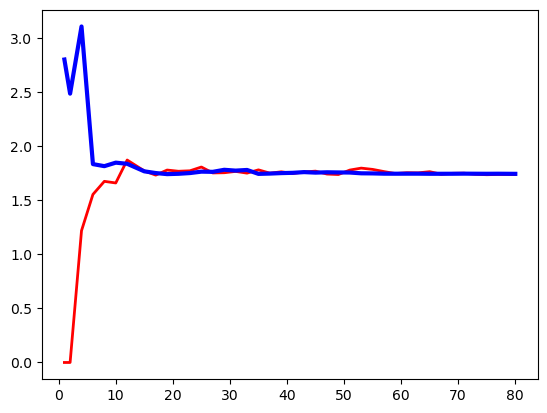

In [84]:
plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="Trainingsdatensatz")
         
         
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validierungsdatensatz")

         
plt.show()